In [1]:
import numpy as np
from MOEAD import MOEAD
from Problem import ZDT1

problem = ZDT3()
pop_size = 100
n_gen = 100
n_var = 30
population = [np.random.rand(n_var) for _ in range(pop_size)]

res = MOEAD()
res.optimize(Problem=problem,
             population=population,
             n_gen=n_gen)

F = res.get_F()
print(F)

NameError: name 'ZDT3' is not defined

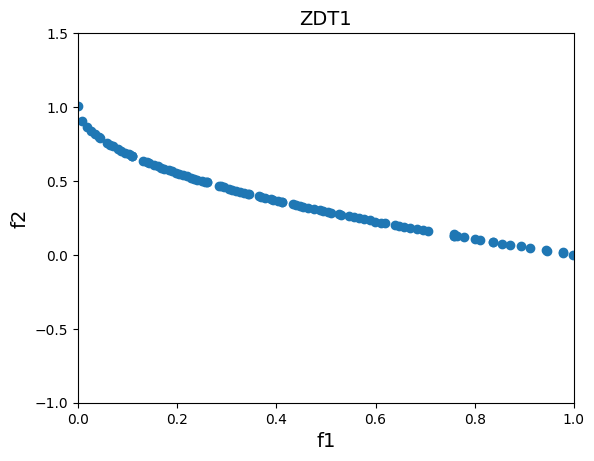

In [ ]:
# --- 散布図 ---
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.xlabel("f1", fontsize=14)
plt.ylabel("f2", fontsize=14)
plt.title("ZDT1", fontsize=14)
plt.xlim(0,1)
plt.ylim(-1,1.5)

#plt.scatter(f_values[:, 0], f_values[:, 1])    # 全解
plt.scatter(F[:, 0], F[:, 1])    # 非劣解